# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [73]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import  tt_ind_solve_power


df = pd.read_csv("homepage_actions.csv")
df.head(25)


,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
5,2016-09-24 20:32:25.712659,681598,experiment,view
6,2016-09-24 20:39:03.248853,522116,experiment,view
7,2016-09-24 20:57:20.336757,349125,experiment,view
8,2016-09-24 20:58:01.948663,349125,experiment,click
9,2016-09-24 21:00:12.278374,560027,control,view


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
timestamp    8188 non-null object
id           8188 non-null int64
group        8188 non-null object
action       8188 non-null object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


In [83]:
df.describe()

,id
count,8188.000000
mean,564699.749878
std,219085.845672
min,182988.000000
25%,373637.500000
50%,566840.500000
75%,758078.000000
max,937217.000000


In [84]:
df.group.describe()

count        8188
unique          2
top       control
freq         4264
Name: group, dtype: object

In [85]:
df.action.describe()

count     8188
unique       2
top       view
freq      6328
Name: action, dtype: object

In [86]:
# What is this id number about?
df.id.describe()

count      8188.000000
mean     564699.749878
std      219085.845672
min      182988.000000
25%      373637.500000
50%      566840.500000
75%      758078.000000
max      937217.000000
Name: id, dtype: float64

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


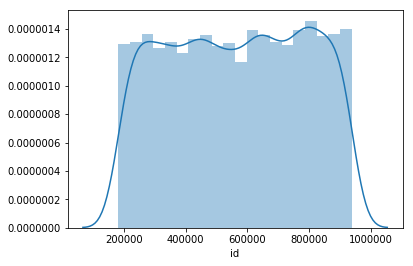

In [87]:
sns.distplot(df.id)

In [88]:
# cat.codes still didn't work for me
# df["action"].cat.codes
# df.head()

In [89]:
cleanup_nums = {"action":  {"click": 0, "view": 1}}
                                                                
df.replace(cleanup_nums, inplace=True)
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,1
1,2016-09-24 19:19:03.542569,434745,experiment,1
2,2016-09-24 19:36:00.944135,507599,experiment,1
3,2016-09-24 19:59:02.646620,671993,control,1
4,2016-09-24 20:26:14.466886,536734,experiment,1


In [90]:
experiment = df[df.group == "experiment"]
control = df[df.group == "control"]


In [91]:
e = experiment.drop(["timestamp", "id"], axis=1)
c = control.drop(["timestamp", "id"], axis=1)
e.head()

,group,action
0,experiment,1
1,experiment,1
2,experiment,1
4,experiment,1
5,experiment,1


In [92]:
c1 = c.mean()
c2 = c.std()
c3 = len(c)
e1 = e.mean()
e2 = e.std()
e3 = len(e)

print(c1)
print(c2)
print(c3)
print(e1)
print(e2)
print(e3)

action    0.781426
dtype: float64
action    0.413327
dtype: float64
4264
action    0.763507
dtype: float64
action    0.424983
dtype: float64
3924


In [54]:
# Not working - TypeError: must be str, not int
#sns.distplot(e)
#sns.distplot(c)

In [99]:
c.describe()

,action
count,4264.000000
mean,0.781426
std,0.413327
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [151]:
c_view = len(c)*c.mean()
print(c_view)

action    3332.0
dtype: float64


In [152]:
e_view = len(e)*e.mean()
print(e_view)

action    2996.0
dtype: float64


In [153]:
c_click = len(c)-c_view
c_click

action    932.0
dtype: float64

In [154]:
e_click = len(e)-e_view
e_click

action    928.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c16bc1e48>]],
      dtype=object)

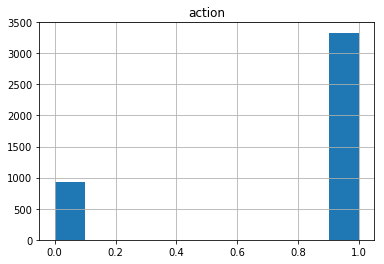

In [101]:
c.hist()

In [102]:
e.describe()

,action
count,3924.000000
mean,0.763507
std,0.424983
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [108]:
len(e)

3924

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c16dcdc18>]],
      dtype=object)

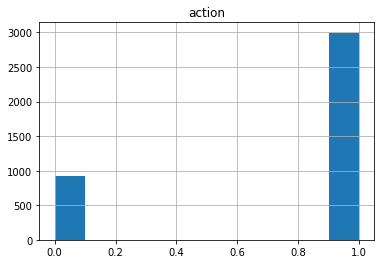

In [103]:
e.hist()

In [93]:
#Put data into 2 groups
f1 = 'group'
f2 = 'action'
f1c1 = "click"
f1c2 = "view"
subset = df[(~df[f1].isnull()) & (~df[f2].isnull())]
s1 = subset[subset[f1]==f1c1][f2]
s2 = subset[subset[f1]==f1c2][f2]

//anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


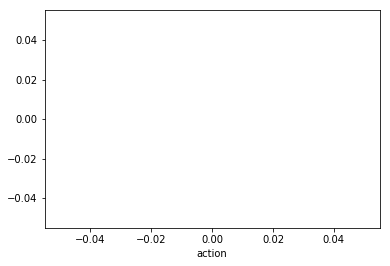

In [94]:
# Some sort of error here
sns.distplot(s1)
sns.distplot(s2)

In [95]:
# %load flatiron_stats.py
#flatiron_stats
import numpy as np
import scipy.stats as stats

def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. This function returns the degrees of freedom """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator


def p_value_welch_ttest(a, b, two_sided=False):
    """Calculates the p-value for Welch's t-test given two samples.
    By default, the returned p-value is for a one-sided t-test. 
    Set the two-sided parameter to True if you wish to perform a two-sided t-test instead.
    """
    t = welch_t(a, b)
    df = welch_df(a, b)
    
    p = 1-stats.t.cdf(np.abs(t), df)
    
    if two_sided:
        return 2*p
    else:
        return p

In [96]:
print('Comparison of {} for {} and {}'.format(f2, f1c1, f1c2))
print("Median Values: \tcontrol: {} \texperimental: {}".format(round(c.median(),2), round(e.median(),2)))
print("Mean Values: \tcontrol: {} \texperimental: {}".format(round(c.mean(),2), round(e.mean(),2)))
print('Sample sizes: \tcontrol: {} \texperimental: {}'.format(len(c), len(e)))


Comparison of action for click and view
Median Values: 	control: action    1.0
dtype: float64 	experimental: action    1.0
dtype: float64
Mean Values: 	control: action    0.78
dtype: float64 	experimental: action    0.76
dtype: float64
Sample sizes: 	control: 4264 	experimental: 3924


In [130]:
print("Welch's t-test p-value:", p_value_welch_ttest(e, c))

Welch's t-test p-value: [0.00315871]


In [ ]:
# ANOVA test using id?

In [79]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'id ~ C(group) + C(action)'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                 sum_sq      df         F    PR(>F)
C(group)   3.067755e+10     1.0  0.639049  0.424079
C(action)  1.194185e+10     1.0  0.248762  0.617961
Residual   3.929211e+14  8185.0       NaN       NaN


## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [155]:
c_click

action    932.0
dtype: float64

In [162]:
p = c_click/len(c)
p

action    0.218574
dtype: float64

In [172]:
1 - c.mean()

action    0.218574
dtype: float64

In [173]:
p * len(e)

action    857.684803
dtype: float64

In [163]:
#Your code here
n = len(e) #(samples or trials)
p = p #(probability of success)
size = 1000 #(number of experiments)

binomial_dis = np.random.binomial(n, p, size)
binomial_dis.mean()

860.058

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


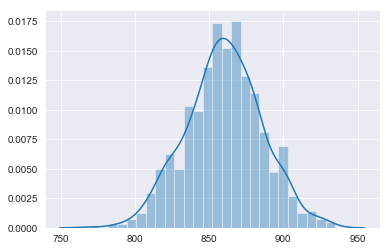

In [164]:
sns.distplot(binomial_dis)

### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [165]:
#Your code here
binomial_dis.std()

25.586297817386555

In [166]:
c.std()

action    0.413327
dtype: float64

In [178]:
e.std()

action    0.424983
dtype: float64

### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [168]:
#Your code here
import scipy.stats as st
print(st.norm.ppf(1-e.std()))
print("p_values:", st.norm.cdf(e.std()))

[0.1891626]
p_values: [0.66457535]


### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: **Your analysis here**

In [ ]:
# h_0 = There is no difference between the control and the experimental groups.
# (Number of clicks is equal)
# h_1 = The experimental group will have a higher number of clicks than the control.
# (Number of clicks > than before)

In [ ]:
# ANOVA p_value = ?
# z-score p_value = 0.66
# Welch's p_value = 0.0032


In [ ]:
# I know from their averages, the experimental group got more clicks so perhaps the Welch's
# value is better. Still not sure what happened with the ANOVA and the z-score.

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.

In [ ]:
# Their code solution

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

df = pd.read_csv('homepage_actions.csv')
print(len(df))
df.head()

8188


,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [132]:
df.action.value_counts()

view     6328
click    1860
Name: action, dtype: int64

In [133]:
cids = set(df[df.action=='click']['id'].unique())
vids = set(df[df.action=='view']['id'].unique())
print("Number of viewers: {} \tNumber of clickers: {}".format(len(vids), len(cids)))
print("Number of Viewers who didn't click: {}".format(len(vids-cids)))
print("Number of Clickers who didn't view: {}".format(len(cids-vids)))

Number of viewers: 6328 	Number of clickers: 1860
Number of Viewers who didn't click: 4468
Number of Clickers who didn't view: 0


In [134]:
# Comment: Everyone who clicked, also viewed the homepage! 
# (Thank goodness!)

In [135]:
eids = set(df[df.group=='experiment']['id'].unique())
cids = set(df[df.group=='control']['id'].unique())
print('Overlap of experiment and control groups: {}'.format(len(eids&cids)))

Overlap of experiment and control groups: 0


In [136]:
# Comment: No overlap between the experiment and control groups.


In [138]:
df['count'] = 1
df.head(10)

,timestamp,id,group,action,count
0,2016-09-24 17:42:27.839496,804196,experiment,view,1
1,2016-09-24 19:19:03.542569,434745,experiment,view,1
2,2016-09-24 19:36:00.944135,507599,experiment,view,1
3,2016-09-24 19:59:02.646620,671993,control,view,1
4,2016-09-24 20:26:14.466886,536734,experiment,view,1
5,2016-09-24 20:32:25.712659,681598,experiment,view,1
6,2016-09-24 20:39:03.248853,522116,experiment,view,1
7,2016-09-24 20:57:20.336757,349125,experiment,view,1
8,2016-09-24 20:58:01.948663,349125,experiment,click,1
9,2016-09-24 21:00:12.278374,560027,control,view,1


In [139]:
#Convert clicks into a binary variable on a user-by-user-basis
control = df[df.group=='control'].pivot(index='id', columns='action', values='count')
control = control.fillna(value=0)

experiment = df[df.group=='experiment'].pivot(index='id', columns='action', values='count')
experiment = experiment.fillna(value=0)



print("Sample sizes:\tControl: {}\tExperiment: {}".format(len(control), len(experiment)))
print("Total Clicks:\tControl: {}\tExperiment: {}".format(control.click.sum(), experiment.click.sum()))
print("Average click rate:\tControl: {}\tExperiment: {}".format(control.click.mean(), experiment.click.mean()))
control.head()

Sample sizes:	Control: 3332	Experiment: 2996
Total Clicks:	Control: 932.0	Experiment: 928.0
Average click rate:	Control: 0.2797118847539016	Experiment: 0.3097463284379172


action,click,view
id,,
182994,1.0,1.0
183089,0.0,1.0
183248,1.0,1.0
183515,0.0,1.0
183524,0.0,1.0


In [140]:
import flatiron_stats as fs

In [141]:
fs.p_value_welch_ttest(control.click, experiment.click)


0.004466402814337078

In [142]:
# Calculate the expected number of clicks for the experiment group
control_rate = control.click.mean()
expected_experiment_clicks_under_null = control_rate * len(experiment)
print(expected_experiment_clicks_under_null)

838.0168067226891


In [143]:
# Calculate the number of standard deviations that the actual number of clicks
n = len(experiment)
p = control_rate
var = n * p * (1-p)
std = np.sqrt(var)
print(std)

24.568547907005815


In [144]:
actual_experiment_clicks = experiment.click.sum()
z_score = (actual_experiment_clicks - expected_experiment_clicks_under_null)/std
print(z_score)

3.6625360854823588


In [145]:
# Calculate a p-value using the normal distribution based on this z-score
import scipy.stats as stats
p_val = stats.norm.sf(z_score) #or 1 - stats.norm.cdf(z_score)
print(p_val)

0.00012486528006951198


In [150]:
# Comment: Yes, while the p-value is slightly lower, 
# both would lead to confident rejection of the null hypothesis. 
# The experimental page appears to be a more effective design.